# Query 2 - Covid 19 Class Project 1 – Group 5

# This query is used for generating plot graphs from CSV data file: csv_files/COVID_19_time_series_clean_complete_All_Data.csv


# Unusual items noted by the Team are:
* Mexico – usually high mortality rate at 9% in relation confirmed cases. 
* Mid December 2020 – the US discontinued reporting recoveries.
* Cruise ship data for 3 cruise ships was omitted 
* 1) Grand Princes, March 20, 122 cases
* 2) Diamond Princess,  Feb 2020, with 712 Cases
* 3) MS Zaandam –April 2020 - 9 cases

In [2]:
import json
import requests 
import numpy as np
import requests
from scipy.stats import linregress
import pprint as pprint
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from citipy import citipy
# from api_keys import weather_api_key
# from api_keys import g_key
import time as time
#import wget as wget
%matplotlib notebook
import seaborn as sns
%matplotlib inline

In [3]:
# CSV file load
file_to_load = 'csv_files/COVID_19_time_series_clean_complete_All_Data.csv'
covid_19 = pd.read_csv(file_to_load)
confirmed_19_df = pd.DataFrame(covid_19)
del confirmed_19_df["Unnamed: 0"]
confirmed_19_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
89657,2021-05-02,Vietnam,2962,35,2549.0,378.0,20,0,1
89658,2021-05-02,West Bank and Gaza,297638,3272,275392.0,18974.0,1176,23,3059
89659,2021-05-02,Yemen,6341,1233,2875.0,2233.0,16,4,81
89660,2021-05-02,Zambia,91693,1253,90082.0,358.0,23,2,70


In [4]:
confirmed_19_df.dtypes

Date               object
Country/Region     object
Confirmed           int64
Deaths              int64
Recovered         float64
Active            float64
New cases           int64
New deaths          int64
New recovered       int64
dtype: object

In [5]:
# Date conversion from sting to datetime
confirmed_19_df['Date'] = pd.to_datetime(confirmed_19_df['Date'])
confirmed_19_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
89657,2021-05-02,Vietnam,2962,35,2549.0,378.0,20,0,1
89658,2021-05-02,West Bank and Gaza,297638,3272,275392.0,18974.0,1176,23,3059
89659,2021-05-02,Yemen,6341,1233,2875.0,2233.0,16,4,81
89660,2021-05-02,Zambia,91693,1253,90082.0,358.0,23,2,70


In [6]:
confirmed_19_df_by_date_conf = confirmed_19_df.groupby(confirmed_19_df['Date']).sum()
confirmed_19_df_by_date_conf = confirmed_19_df_by_date_conf.drop(["Active", "New cases", "New deaths", "New recovered"], axis=1)
confirmed_19_df_by_date_conf 

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,557,17,30.0
2020-01-23,655,18,32.0
2020-01-24,941,26,39.0
2020-01-25,1433,42,42.0
2020-01-26,2118,56,56.0
...,...,...,...
2021-04-28,149622851,3151122,85650962.0
2021-04-29,150520453,3166125,86348595.0
2021-04-30,151399467,3180403,87025174.0


In [7]:
# Confirmed and Active plot global, time series from 01/2020 through 04/30/2021 
# Group by Date and drop ("Deaths", "Recovered", "New cases", "New deaths")

confirmed_19_df_by_date_active = confirmed_19_df.groupby(confirmed_19_df['Date']).sum()
confirmed_19_df_by_date_active = confirmed_19_df_by_date_active.drop(["Deaths", "Recovered", "New cases", "New deaths", "New recovered"], axis=1)
confirmed_19_df_by_date_active 

,Confirmed,Active
Date,,
2020-01-22,557,510.0
2020-01-23,655,605.0
2020-01-24,941,876.0
2020-01-25,1433,1349.0
2020-01-26,2118,2006.0
...,...,...
2021-04-28,149622851,60820767.0
2021-04-29,150520453,61005733.0
2021-04-30,151399467,61193890.0


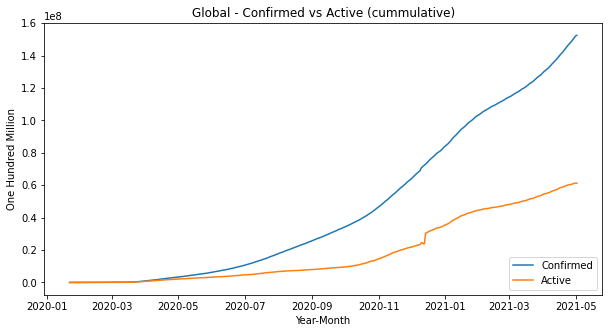

In [8]:
# Confirmed and Active plot global, time series from 01/2020 through 04/30/2021 

plt.figure(figsize=(10,5))
plt.xlabel("Year-Month")
plt.ylabel("One Hundred Million")
plt.title("Global - Confirmed vs Active (cummulative)")
plt.plot(confirmed_19_df_by_date_active)
plt.legend(["Confirmed", "Active"], loc = "lower right")
plt.show()

In [9]:
plt.savefig("global_confirmed_and_active_cummulative.png")

<Figure size 432x288 with 0 Axes>

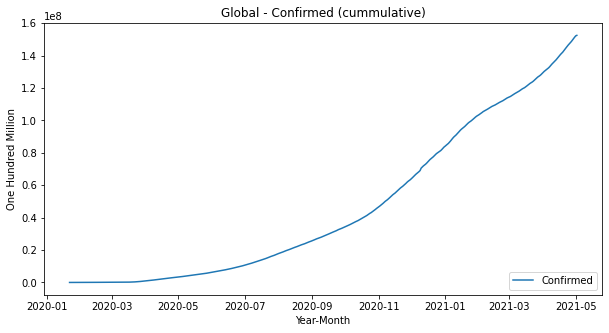

In [10]:
# Confirmed only global plot, time series from 01/2020 through 04/30/2021 

plt.figure(figsize=(10,5))
y_axis = confirmed_19_df_by_date_active["Confirmed"].tolist()
x_axis = confirmed_19_df_by_date_active.index.tolist()
plt.plot(x_axis, y_axis)
plt.xlabel("Year-Month")
plt.ylabel("One Hundred Million")
plt.title("Global - Confirmed (cummulative)")
# plt.plot(confirmed_19_df_by_date_active)
plt.legend(["Confirmed"], loc = "lower right")
plt.show()

In [11]:
plt.savefig("global_confirmed_cummulative.png")

<Figure size 432x288 with 0 Axes>

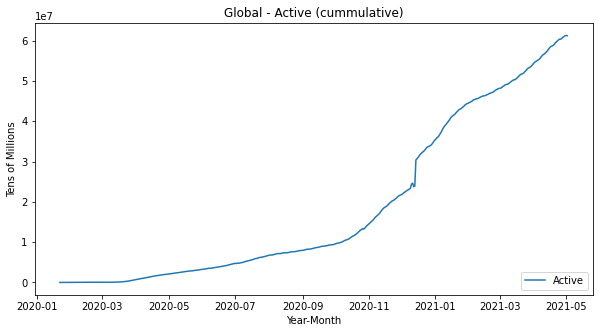

In [12]:
# Active only global plot, time series from 01/2020 through 04/30/2021 

plt.figure(figsize=(10,5))
y_axis2 = confirmed_19_df_by_date_active["Active"].tolist()
x_axis = confirmed_19_df_by_date_active.index.tolist()
plt.plot(x_axis, y_axis2)
plt.xlabel("Year-Month")
plt.ylabel("Tens of Millions")
plt.title("Global - Active (cummulative)")
plt.legend(["Active"], loc = "lower right")
plt.show()

In [13]:
plt.savefig("global_active_cummulative.png")

<Figure size 432x288 with 0 Axes>

In [14]:
confirmed_19_df_by_date_conf_death_recov = confirmed_19_df.groupby(confirmed_19_df['Date']).sum()
confirmed_19_df_by_date_conf_death_recov = confirmed_19_df_by_date_conf_death_recov.drop(["Active", "Confirmed", "Deaths", "New cases", "New deaths", "New recovered"], axis=1)
confirmed_19_df_by_date_conf_death_recov

,Recovered
Date,
2020-01-22,30.0
2020-01-23,32.0
2020-01-24,39.0
2020-01-25,42.0
2020-01-26,56.0
...,...
2021-04-28,85650962.0
2021-04-29,86348595.0
2021-04-30,87025174.0


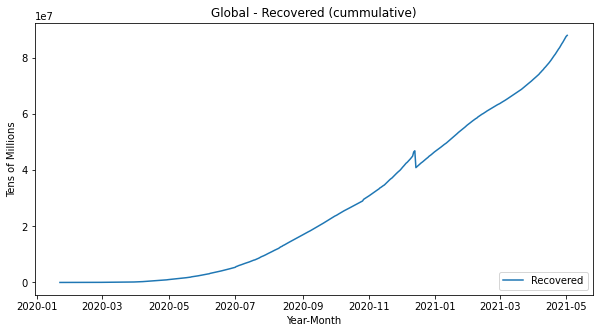

In [15]:
# Recovered only global plot, time series from 01/2020 through 04/30/2021 
# Mid December 2020 – the US discontinued reporting recoveries
plt.figure(figsize=(10,5))
plt.xlabel("Year-Month")
plt.ylabel("Tens of Millions")
plt.title("Global - Recovered (cummulative)")
plt.plot(confirmed_19_df_by_date_conf_death_recov)
plt.legend(["Recovered"], loc = "lower right")
plt.show()

In [16]:
plt.savefig("global_recovered_cummulative.png")

<Figure size 432x288 with 0 Axes>

In [17]:
confirmed_19_df_by_date_conf_death_death = confirmed_19_df.groupby(confirmed_19_df['Date']).sum()
confirmed_19_df_by_date_conf_death_death = confirmed_19_df_by_date_conf_death_death.drop(["Active", "Recovered", "Confirmed", "New cases", "New deaths", "New recovered"], axis=1)
confirmed_19_df_by_date_conf_death_death

,Deaths
Date,
2020-01-22,17
2020-01-23,18
2020-01-24,26
2020-01-25,42
2020-01-26,56
...,...
2021-04-28,3151122
2021-04-29,3166125
2021-04-30,3180403


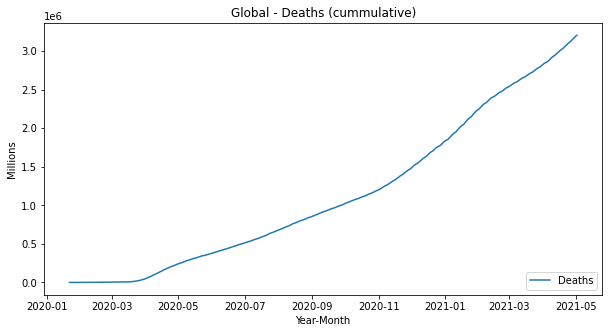

In [18]:
plt.figure(figsize=(10,5))
plt.xlabel("Year-Month")
plt.ylabel("Millions")
plt.title("Global - Deaths (cummulative)")
plt.plot(confirmed_19_df_by_date_conf_death_death)
plt.legend(["Deaths"], loc = "lower right")
plt.show()

In [19]:
plt.savefig("global_deaths_cummulative.png")

<Figure size 432x288 with 0 Axes>

Note: Effective 12/14/2020, the US discontinued reporting the number of recoveries on a daily bases.  This represents a 6.3M adjustment to cummulative recoveries. The US has continued to report "zero" recoveries since this date. 

In [20]:
confirmed_19_df_by_date_conf_death_recov
confirmed_19_df_by_date_conf_death_recov['2020-12-13':'2020-12-15']

,Recovered
Date,
2020-12-13,46928886.0
2020-12-14,40932277.0
2020-12-15,41283854.0


See below - effective 12/14/2020, the US discontinued reporting the number of recoveries on a daily bases. 

In [21]:
df = confirmed_19_df.groupby("Country/Region").get_group("US")
df1 = df.loc[(df["Date"] == "2020-12-13") | (df["Date"] == "2020-12-14") | (df["Date"] == "2020-12-15")]
df1

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
62768,2020-12-13,US,16432729,303649,6298082.0,9830998.0,187703,1628,51477
62960,2020-12-14,US,16627550,305301,0.0,16322249.0,194821,1652,-6298082
63152,2020-12-15,US,16836556,308420,0.0,16528136.0,209006,3119,0


In [22]:
df_china = confirmed_19_df.groupby("Country/Region").get_group("China")
df_china = df_china.drop(["Country/Region", "Active", "Recovered", "Deaths", "New cases", "New deaths", "New recovered"], axis=1)
df_china

,Date,Confirmed
36,2020-01-22,548
226,2020-01-23,643
418,2020-01-24,920
610,2020-01-25,1406
802,2020-01-26,2075
...,...,...
88738,2021-04-28,102446
88930,2021-04-29,102474
89122,2021-04-30,102494
89314,2021-05-01,102517


In [23]:
df_china['Date'] = pd.to_datetime(df_china['Date'])
df_chinav2 = df_china.groupby("Date").sum()

In [24]:
df_chinav2

,Confirmed
Date,
2020-01-22,548
2020-01-23,643
2020-01-24,920
2020-01-25,1406
2020-01-26,2075
...,...
2021-04-28,102446
2021-04-29,102474
2021-04-30,102494


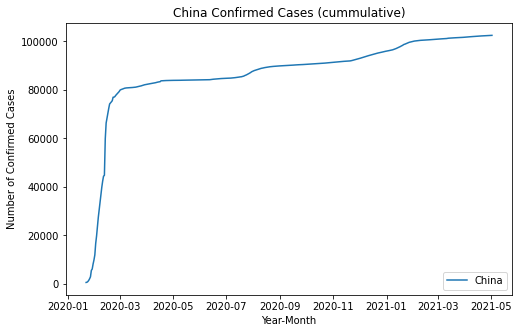

In [25]:
# Confirmed cases for China only from 01/2020 through 04/30/2021
plt.figure(figsize=(8,5))
plt.xlabel("Year-Month")
plt.ylabel("Number of Confirmed Cases")
plt.title("China Confirmed Cases (cummulative)")
plt.plot(df_chinav2)
plt.legend(["China"], loc = "lower right")
plt.show()

In [26]:
plt.savefig("china_confirmed_cummulative.png")

<Figure size 432x288 with 0 Axes>